In [1]:
import random

In [2]:
def dot(mat_A, mat_B):
    Ai = len(mat_A)
    Bi = len(mat_B)
    Aj = len(mat_A[0])
    Bj = len(mat_B[0])
    matrix = []
    for i in range(Ai):
        part = []
        for j in range(Bj):
            temp = 0
            for k in range(Aj):
                temp = temp + mat_A[i][k]*mat_B[k][j]
            part.append(temp)
        matrix.append(part)
    return matrix  

def T(m):
    return [*map(list,zip(*m))]

In [3]:
def LU_inv(m):
    n = len(m)
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]
    for i in range(n):
        for j in range(n):
            if i == j:
                L[i][j] = 1.0
                temp = 0.0
                for k in range(len(m) - 1):
                    temp = temp + L[i][k] * U[k][j]
                U[i][j] = m[i][j] - temp
                
            elif i > j:
                temp = 0.0
                for k in range(len(m[0]) - 1):
                    temp = temp + L[i][k]*U[k][j]
                L[i][j] = (m[i][j] - temp) / U[j][j]
                U[i][j] = 0.0
                
            else:
                L[i][j] = 0.0
                temp = 0.0
                for k in range(len(m) - 1):
                    temp = temp + L[i][k] * U[k][j]
                U[i][j] = m[i][j] - temp
                
    I = [[0.0] * n for i in range(n)]
    for i in range(n):
        I[i][i] = 1.0

    Z = [[0.0] * n for i in range(n)]
    Z[0][0] = 1.0
    for row_index, row in enumerate(L):
        for col_index, col in enumerate(row):
            total = 0
            for k in range(row_index):
                total = total + L[row_index][k] * Z[k][col_index] 
            Z[row_index][col_index] = I[row_index][col_index] - total

    n = len(U)
    A_inv = [[0.0] * n for i in range(n)]
    for row_index in range(len(U)-1, -1, -1):
        for col_index in range(len(U)):
            total = 0
            for k in range(n-1-row_index):
                total = total + U[row_index][n-k-1] * A_inv[n-k-1][col_index] 
            A_inv[row_index][col_index] = (Z[row_index][col_index] - total) / U[row_index][row_index]

    return A_inv

In [4]:
def generate_A(A, poly=2):
    matrix = []
    for element in A:
        x = [1]
        for p in range(1, poly):
            x.append(x[-1] * element)
        matrix.append(x)
    return matrix

In [5]:
def add(A, B):
    row = len(A)
    col = len(A[0])
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        print('Error two matrix are not same size!!')
        return 
    else:
        m = [[0.0] * col for i in range(row)]
        for i in range(row):
            for j in range(col):
                m[i][j] = A[i][j] + B[i][j]
        return m
    
def sub(A, B):
    row = len(A)
    col = len(A[0])
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        print('Error two matrix are not same size!!')
        return 
    else:
        m = [[0.0] * col for i in range(row)]
        for i in range(row):
            for j in range(col):
                m[i][j] = A[i][j] - B[i][j]
        return m
    

In [71]:
def poly_model(data, poly, method='newton', epoch=30, c=1):
    x = [i[0] for i in data]
    b = [[i[1]] for i in data]
    A = generate_A(x, poly)
    AT = T(A)
    
    if method=='newton':
        X_old = [[random.uniform(-100, 100)] for i in range(poly)]
        for _ in range(epoch):
            t1 = dot(dot(dot(LU_inv(dot(AT, A)), AT), A), X_old)
            t2 = dot(dot(LU_inv(dot(AT, A)), AT), b)
            X_new = add(sub(X_old, t1), t2) 
            X_old = X_new
        error = dot(T(sub(dot(A, X_old), b)),sub(dot(A, X_old), b))
        print('Newton\'s Method : ')
        print('Total_error = ', error[0][0])
        return X_old
    
    else:
        mat = dot(AT, A)
        l = len(mat)
        I = [[0.0] * l for i in range(l)]
        for i in range(l):
            I[i][i] = 1.0 * c
        coef = dot(dot(LU_inv(add(dot(AT, A), I)), AT), b)
        error = dot(T(sub(dot(A, coef), b)),sub(dot(A, coef), b))
        print('LSE : ')
        print('Total_error = ', error[0][0])
        return coef #return X^0 -> X^n

In [72]:
def printline(coe):
    print('Fitting line :',end='')
    for x_i, coef in reversed(list(enumerate(coe))):
        op = ' '
        if coef[0] > 0 and x_i != len(coe)-1:
            op = ' +'
        if x_i == 0 :
            print(op + str(coef[0])+str(x_i), end='')
        else:
            print(op + str(coef[0])+'X^'+str(x_i), end='')
#     print(x_i, coef[0])

In [81]:
data = [
#   [x, y],
   [ -5.0,51.76405234596766],
[-4.795918367346939,45.42306433039972],
[-4.591836734693878,41.274448104888755],
[-3.979591836734694,26.636216497466364],
[-3.571428571428571,20.256806057008426],
[-2.9591836734693877,11.618429243797276],
[-2.7551020408163263,10.450525068812203],
[-1.7346938775510203,1.8480982318414874],
[-1.3265306122448979,-1.0405349639051173],
[-0.9183673469387754,-4.614630798757861],
[-0.7142857142857144,-1.3871977310902517],
[-0.3061224489795915,-1.9916444039966117],
[0.1020408163265305,-0.912924608376358],
[0.7142857142857144,6.63482003068499],
[1.1224489795918373,9.546867459016372],
[1.7346938775510203,15.72016146597016],
[1.9387755102040813,20.62251683859554],
[2.5510204081632653,33.48059725819715],
[2.959183673469388,40.76391965675495],
[3.979591836734695,66.8997605629381],
[4.387755102040817,78.44316465660981],
[4.591836734693878,86.99156782355371],
[5.0,99.78725971978604]
]

coe = poly_model(data, 3, 'LSE', c=10000)
printline(coe)

print('\n')
coe2 = poly_model(data, 3, 'newton', epoch=100)
printline(coe2)

LSE : 
Total_error =  22649.738493024146
Fitting line : 0.834533282700286X^2 +0.09314819831918814X^1 +0.046950699273469280

Newton's Method : 
Total_error =  26.55995949933305
Fitting line : 3.023853393486572X^2 +4.906190263863799X^1 -0.231401756087732220

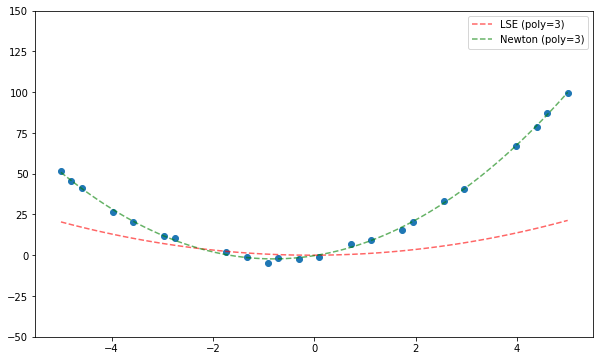

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(-5, 5, 100)

ans = []
ans2 = []
my_x = [i[0] for i in data]
my_y = [[i[1]] for i in data]

for item in x1:
    total = 0
    for i in range(len(coe)):
        total += pow(item,i)*coe[i][0]
    ans.append(total)
    
    total2 = 0
    for i in range(len(coe2)):
        total2 += pow(item,i)*coe2[i][0]
    ans2.append(total2)

plt.figure(figsize=(10,6))
plt.scatter(my_x, my_y)
plt.plot(x1, ans, 'r--', alpha=0.6, label='LSE (poly='+str(len(coe))+')')
plt.plot(x1, ans2, 'g--', alpha=0.6, label='Newton (poly='+str(len(coe2))+')')
plt.legend()
plt.ylim(-50, 150)
plt.show()

In [9]:
# def LSE(data, poly):
#     x = [i[0] for i in data]
#     b = [[i[1]] for i in data]
#     A = generate_A(x, poly)
#     AT = T(A)
#     coef = dot(dot(LU_inv(dot(AT, A)), AT), b)
    
#     error = dot(T(sub(dot(A, coef), b)),sub(dot(A, coef), b))
#     print('LSE_error = ', error[0][0])
    
#     return coef #return X^0 -> X^n

In [10]:
# def newton(data, poly, epoch=10):
#     x = [i[0] for i in data]
#     b = [[i[1]] for i in data]
#     A = generate_A(x, poly)
#     AT = T(A)
#     X_old = [[random.uniform(-100, 100)] for i in range(poly + 1)]
#     for _ in range(epoch):
#         t1 = dot(dot(dot(LU_inv(dot(AT, A)), AT), A), X_old)
#         t2 = dot(dot(LU_inv(dot(AT, A)), AT), b)
#         X_new = add(sub(X_old, t1), t2) 
#         X_old = X_new
        
#     error = dot(T(sub(dot(A, X_old), b)),sub(dot(A, X_old), b))
#     print('Newton_error = ', error[0][0])
    
#     return X_old

In [11]:
# coe = LSE(data, 3)
# print(coe)
# print()
# coe2 = newton(data, 7)
# print(coe2)